## **Import Libraries**

In [19]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## **Dataset Preparation**

In [20]:
data = np.sin(np.linspace(0, 100, 1000))
sequence_length = 50

### Buat Dataset Sequential

In [21]:
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

In [22]:
X, y = create_sequences(data, sequence_length)

### Split Data (Train & Test)

In [23]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## **Model Training**

In [25]:
model = Sequential()

### Layer Pertama

In [26]:
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

### Layer Kedua

In [27]:
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

### Layer Output

In [28]:
model.add(Dense(1))

### Arsitektur Model

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

## **Model Training**

In [31]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 0.3344 - val_loss: 0.0080
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0134 - val_loss: 0.0026
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0083 - val_loss: 8.9799e-04
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0069 - val_loss: 6.6951e-04
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0062 - val_loss: 8.0948e-04
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0062 - val_loss: 3.3869e-04
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0059 - val_loss: 5.3079e-04
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0054 - val_loss: 3.9335e-04
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0053 - val_loss: 0.0012
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0063 - val_loss: 0.0014
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0051 - val_loss: 2.8058e-04
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━

## **Model Evaluation & Visualisation**

### Evaluasi Model

In [32]:
loss = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.0620e-04
Loss: 0.0008698683232069016


In [33]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


### Visualisasi Model

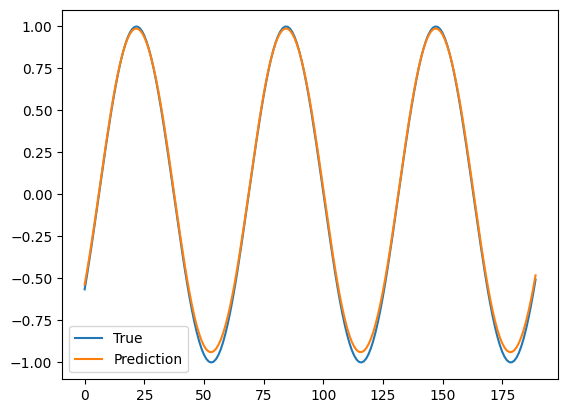

In [34]:
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Prediction')
plt.legend()
plt.show()